## Spatial Overlays

```{admonition} Summary
:class: hint

Just like in GIS software, Python allows you to perform spatial overlay operations, which combine multiple spatial datasets based on their locations. In this section explores different types of spatial operations using the `overlay()` function in `GeoPandas`.

```

Load required libraries: 

In [52]:
import geopandas as gp
import matplotlib.pyplot as plt
from pathlib import Path

Define file paths: 

In [71]:
INPUT_Path = Path.cwd().parents[0] / "out"

Load input data:

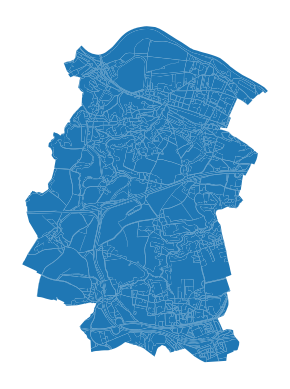

In [72]:
input_data = gp.read_file (INPUT_Path / "clipped.shp")
ax=input_data.plot()
ax.set_axis_off() 

Check the coordinate system:

In [55]:
input_data.crs

<Projected CRS: EPSG:25833>
Name: ETRS89 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°E and 18°E: Austria; Croatia; Denmark - offshore and offshore; Germany - onshore and offshore; Italy - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (12.0, 34.79, 18.01, 84.01)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Load overlay data:

In [73]:
# District data from the Dresden portal Already mentioned in the Clipping Data chapter
import requests
geojson_url = "https://kommisdd.dresden.de/net4/public/ogcapi/collections/L137/items"
response = requests.get(geojson_url)
if response.status_code == 200:
    gdf = gp.read_file(geojson_url)
    
else:
    print("Error:", response.text)

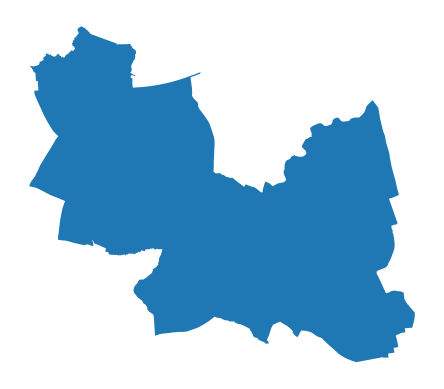

In [57]:
overlay_data= gdf[gdf['id']== '99']
ax=overlay_data.plot()
ax.set_axis_off()

Check the coordinate system:

In [58]:
overlay_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In case the coordinate system of the layers are different match the coordinates using `to_crs` method.

In [59]:
overlay_data = overlay_data.to_crs(input_data.crs)

The `overlay()`  function in GeoPandas allows different types of spatial operations, defined by the `how` parameter.

The following list explains available operations:
- `intersection` – Returns the overlapping (shared) area between two geometries.
- `union` - Merges both geometries into a single geometry.
- `difference` - Subtract second geometry from the first geometry.
- `symmetric_difference` - The areas that are in either of the two geometries, but not in both
- `identity`- Keeps the shape of the first geometry while adding overlapping parts from the second geometry.


```{admonition} Overlay Analysis
:class: danger
For more information, check the [GeoPandas spatial overlay documentation](https://geopandas.org/en/stable/docs/user_guide/set_operations.html).
```

Examples how to apply these operations: 

In [ ]:
# Intersection: Find the overlapping (shared) area between input_data and overlay_data
out_intersection = gp.overlay(
    input_data, overlay_data,
    how='intersection')

# Union: Merge input_data and overlay_data into one geometry
out_union = gp.overlay(
    input_data, overlay_data,
    how='union')

# Difference: Subtract overlay_data from input_data
out_difference = gp.overlay(
    input_data, overlay_data,
    how='difference')

# Symmetric Difference: Get areas that are in either geometry, but not both
out_symmetric = gp.overlay(
    input_data, overlay_data,
    how='symmetric_difference')

# Identity: Retain the first geometry but mark overlapping areas with the second geometry
out_identity = gp.overlay(
    input_data, overlay_data,
    how='identity')

The results can be inspected by using the `print` function, which will show the first few rows of the overlayed dataset.

Example:

In [61]:
print(out_symmetric.head())

  KS_IS CLC_st1 CLC18    CLC  Biotpkt201   Shape_Leng     Shape_Area   id  \
0  None     112   112  112.0    7.150000   122.271774     457.162617  NaN   
1  None     311   311  311.0   16.503069   315.595049    3746.157997  NaN   
2  None     211   211  211.0    6.336151  2119.697191  138157.775431  NaN   
3    HW     122  None    NaN    5.271487  1324.614876    2960.463724  NaN   
4  None     211   211  211.0    6.336151  1130.132105   60835.673105  NaN   

   bez bez_lang  flaeche_km2  sst sst_klar historie aend  \
0  NaN      NaN          NaN  NaN      NaN      NaN  NaN   
1  NaN      NaN          NaN  NaN      NaN      NaN  NaN   
2  NaN      NaN          NaN  NaN      NaN      NaN  NaN   
3  NaN      NaN          NaN  NaN      NaN      NaN  NaN   
4  NaN      NaN          NaN  NaN      NaN      NaN  NaN   

                                            geometry  
0  POLYGON ((404140.322 5654373.512, 404139.007 5...  
1  POLYGON ((403977.642 5654356.446, 403988.445 5...  
2  POLYGON 

The results can be visualized by using the `plot` function.

Example:

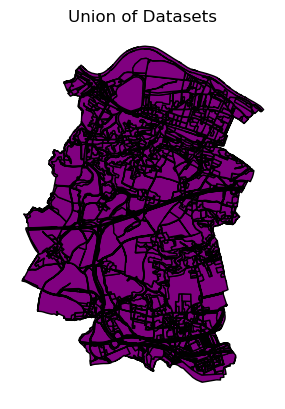

In [68]:
ax = out_union.plot(
    color="purple", 
    edgecolor="black")
ax.set_title("Union of Datasets")
ax.set_axis_off()

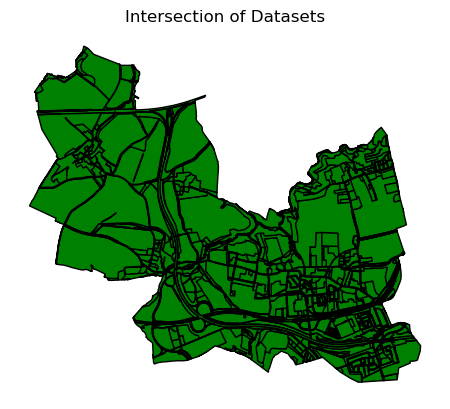

In [66]:
ax = out_intersection.plot(
    color="green", 
    edgecolor="black")
ax.set_title("Intersection of Datasets")
ax.set_axis_off()

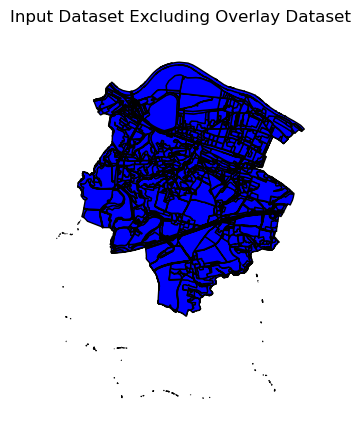

In [70]:
ax = out_difference.plot(
    color="blue", 
    edgecolor="black")
ax.set_title("Input Dataset Excluding Overlay Dataset")
ax.set_axis_off()